## Top 20 Fake Words

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

In [18]:
fake_df = pd.read_csv(r"Fake.csv", sep=',')
fake_df.sample(10)

,title,text,subject,date
21243,HELL FREEZES OVER…Or Does It? [Video] Hundreds...,It only took what 14 years for this to happen?...,left-news,"Dec 8, 2015"
17827,WOW! DNC WILL KEEP Dirty Harvey’s Money To Fun...,The Democratic National Committee announced Fr...,left-news,"Oct 11, 2017"
7813,"Bette Midler SLAMS Trump, Rubio, And Terrible...","Once again, Bette Midler has outdone herself i...",News,"February 28, 2016"
9917,Sarah Sanders Blasts Hillary Clinton’s Excuses...,Sarah Sanders is at it again At the 22:29 poin...,politics,"Sep 13, 2017"
2678,WATCH: Trump Literally Promises To Gut Financ...,Donald Trump was blunt when he explained why h...,News,"February 5, 2017"
14730,WATCH FUNNIEST MAN In American Politics Ridicu...,You don t want to miss this!Here s a little in...,politics,"Dec 31, 2015"
10726,KATHY GRIFFIN Lawyers Up with Ridiculous Claim...,Kathy Griffin is now digging herself a deeper ...,politics,"Jun 2, 2017"
11807,DC WAITRESS Who Admits To Being Prejudiced…Get...,Slowly but surely our nation will heal. It wil...,politics,"Jan 26, 2017"
905,Trump Spoke With Putin About Election Interfe...,"On Friday, Donald Trump finally got the chance...",News,"July 7, 2017"
5432,Here’s How Trump’s VP Pick Lobbied To Screw T...,The minimum wage hasn t been raised for nearly...,News,"July 17, 2016"


In [ ]:
vectorizer = CountVectorizer(stop_words='english',binary=True)
matrix = vectorizer.fit_transform(fake_df['title']+' '+fake_df['text'])


In [ ]:
# Convert back to a DataFrame
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, 
    columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(5)


,00,000,0000,00000017,000048,00007,000a,000after,000although,000american,...,zzqvyk8xif,zzsg90pbf6,zztaine,zzucqevt3m,zzuml4hkoc,zzzzaaaacccchhh,zzzzzzzz,zzzzzzzzzzzzz,état,žižek
4397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
freq_items = apriori(sparse_df, min_support=0.2, use_colnames=True, max_len=1)
freq_items_sorted = freq_items.sort_values(by='support', ascending=False)
top_20_freq_items = freq_items_sorted.head(20)
top_20_freq_items

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
38,0.555854,(trump)
30,0.546229,(said)
17,0.507900,(just)
25,0.490524,(people)
26,0.454836,(president)
40,0.441165,(video)
19,0.437503,(like)
11,0.392402,(donald)
16,0.384183,(image)
36,0.370555,(time)


In [22]:
top_20_freq_items = freq_items_sorted.head(20)
top_20_freq_items['itemsets'].tolist()

[frozenset({'trump'}),
 frozenset({'said'}),
 frozenset({'just'}),
 frozenset({'people'}),
 frozenset({'president'}),
 frozenset({'video'}),
 frozenset({'like'}),
 frozenset({'donald'}),
 frozenset({'image'}),
 frozenset({'time'}),
 frozenset({'featured'}),
 frozenset({'new'}),
 frozenset({'news'}),
 frozenset({'right'}),
 frozenset({'make'}),
 frozenset({'know'}),
 frozenset({'obama'}),
 frozenset({'america'}),
 frozenset({'don'}),
 frozenset({'way'})]

C:\Users\ibrahima\AppData\Local\Temp\ipykernel_23060\1130495337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))


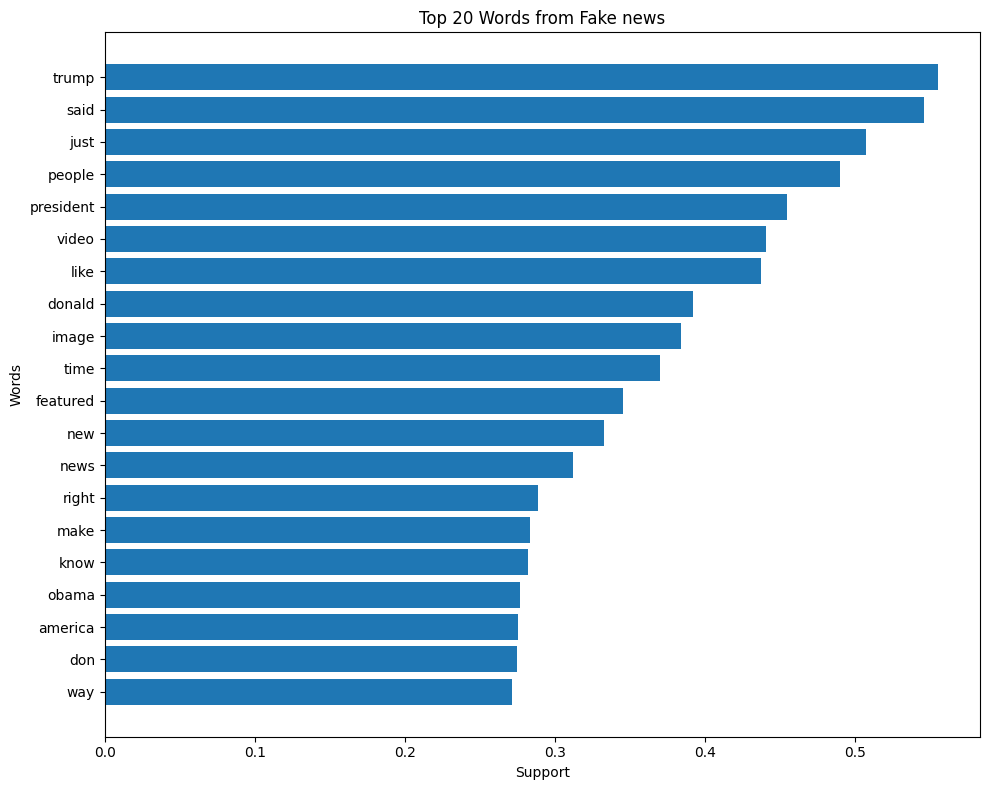

In [ ]:
# Create a Bar Plot
plt.figure(figsize=(10, 8))
top_20_freq_items['itemsets_str'] = top_20_freq_items['itemsets'].apply(lambda x: ', '.join(list(x)))
plt.barh(top_20_freq_items['itemsets_str'], top_20_freq_items['support'])
plt.xlabel('Support')
plt.ylabel('Words')
plt.title('Top 20 Words from Fake news')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()